In [16]:
import evidently
print(evidently.__version__)
import pkgutil
import evidently

for module in pkgutil.iter_modules(evidently.__path__):
    print(module.name)


0.7.16
_pydantic_compat
_registry
_version
cli
core
descriptors
errors
future
generators
guardrails
legacy
llm
metrics
nbextension
presets
pydantic_utils
sdk
telemetry
tests
ui
utils
widgets


In [17]:
# ===============================
# 1️⃣ Librerías
# ===============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:

# ===============================
# 2️⃣ Carga de datos
# ===============================
# CSV sin nombres de columnas
data = pd.read_csv("../data/raw/insurance_company_original.csv", header=None)

# Asignar nombres genéricos
data.columns = [f"col_{i}" for i in range(data.shape[1])]

# Dividir en train/test
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)

print("Shape del dataset:", data.shape)
print("Primeras filas:")
print(data.head())
print("Resumen estadístico:")
print(data.describe())
print("Tipos de columnas:")
print(data.dtypes)


Shape del dataset: (5822, 86)
Primeras filas:
   col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  ...  \
0     33      1      3      2      8      0      5    1.1    3.1      7  ...   
1     37      1      2      2      8      1      4    1.0    4.0      6  ...   
2     37      1      2      2      8      0      4    2.0    4.0      3  ...   
3      9      1      3      3      3      2      3    2.0    4.0      5  ...   
4     40      1      4      2     10      1      4    1.0    4.0      7  ...   

   col_76  col_77  col_78  col_79  col_80  col_81  col_82  col_83  col_84  \
0    0.37    0.38    0.39    1.13     0.4    0.41    0.42    0.43    0.44   
1    0.00    0.00    0.00    1.00     0.0    0.00    0.00    0.00    0.00   
2    0.00    0.00    0.00    1.00     0.0    0.00    0.00    0.00    0.00   
3    0.00    0.00    0.00    1.00     0.0    0.00    0.00    0.00    0.00   
4    0.00    0.00    0.00    1.00     0.0    0.00    0.00    0.00    0.00   

   col_85 

In [19]:
# ===============================
# 3️⃣ Entrenamiento de modelo (opcional)
# ===============================
# Solo para ilustrar predicciones
y_train = np.random.randint(0, 2, size=len(X_train))
y_test = np.random.randint(0, 2, size=len(X_test))

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test:", accuracy_score(y_test, y_pred_test))



Accuracy train: 0.9614723926380369
Accuracy test: 0.49456210646823123


In [20]:
# ===============================
# 4️⃣ Simulación de Data Drift
# ===============================
# Crear versión "drifted" del dataset
X_test_drifted = X_test.copy()

# Ejemplo: alterar las primeras 5 columnas añadiendo ruido
for col in X_test_drifted.columns[:5]:
    X_test_drifted[col] += np.random.normal(0, 1.5, size=len(X_test_drifted))

print("Resumen de las columnas alteradas (drifted):")
print(X_test_drifted[X_test_drifted.columns[:5]].describe())



Resumen de las columnas alteradas (drifted):
             col_0        col_1        col_2        col_3        col_4
count  1747.000000  1747.000000  1747.000000  1747.000000  1747.000000
mean     24.748226     1.111444     2.691381     2.994545     5.868292
std      12.695001     1.529475     1.749601     1.719341     3.188020
min      -3.914510    -3.322275    -3.342020    -2.851197    -2.968675
25%      11.070342     0.074861     1.498203     1.810775     3.322490
50%      30.142498     1.094876     2.680395     3.006500     6.361804
75%      35.125442     2.125655     3.848282     4.182461     8.401047
max      45.124179    10.586963     8.062304     8.376579    15.676151


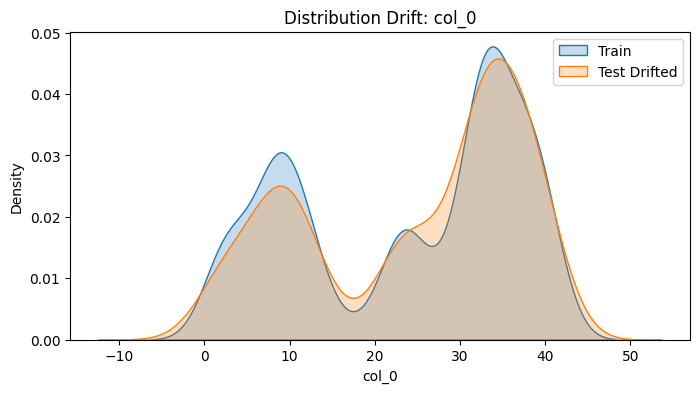

col_0: Train mean=24.03, Test Drifted mean=24.75
col_0: Train std=12.95, Test Drifted std=12.70
col_1: Train mean=1.11, Test Drifted mean=1.11
col_1: Train std=0.40, Test Drifted std=1.53
col_2: Train mean=2.68, Test Drifted mean=2.69
col_2: Train std=0.78, Test Drifted std=1.75
col_3: Train mean=2.99, Test Drifted mean=2.99
col_3: Train std=0.80, Test Drifted std=1.72
col_4: Train mean=5.73, Test Drifted mean=5.87
col_4: Train std=2.89, Test Drifted std=3.19


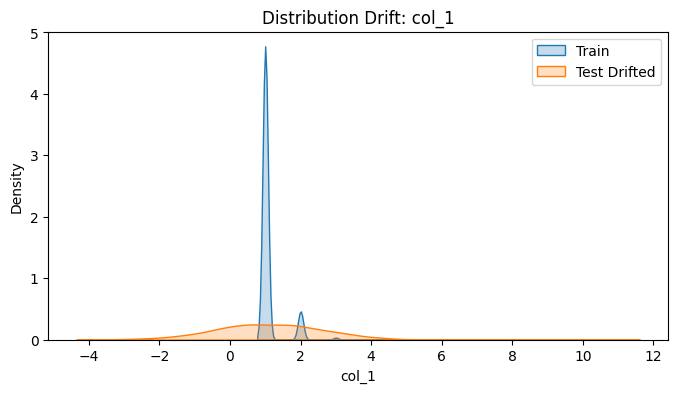

col_0: Train mean=24.03, Test Drifted mean=24.75
col_0: Train std=12.95, Test Drifted std=12.70
col_1: Train mean=1.11, Test Drifted mean=1.11
col_1: Train std=0.40, Test Drifted std=1.53
col_2: Train mean=2.68, Test Drifted mean=2.69
col_2: Train std=0.78, Test Drifted std=1.75
col_3: Train mean=2.99, Test Drifted mean=2.99
col_3: Train std=0.80, Test Drifted std=1.72
col_4: Train mean=5.73, Test Drifted mean=5.87
col_4: Train std=2.89, Test Drifted std=3.19


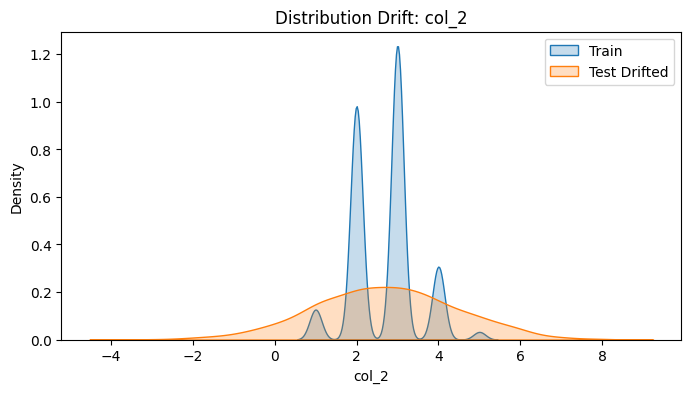

col_0: Train mean=24.03, Test Drifted mean=24.75
col_0: Train std=12.95, Test Drifted std=12.70
col_1: Train mean=1.11, Test Drifted mean=1.11
col_1: Train std=0.40, Test Drifted std=1.53
col_2: Train mean=2.68, Test Drifted mean=2.69
col_2: Train std=0.78, Test Drifted std=1.75
col_3: Train mean=2.99, Test Drifted mean=2.99
col_3: Train std=0.80, Test Drifted std=1.72
col_4: Train mean=5.73, Test Drifted mean=5.87
col_4: Train std=2.89, Test Drifted std=3.19


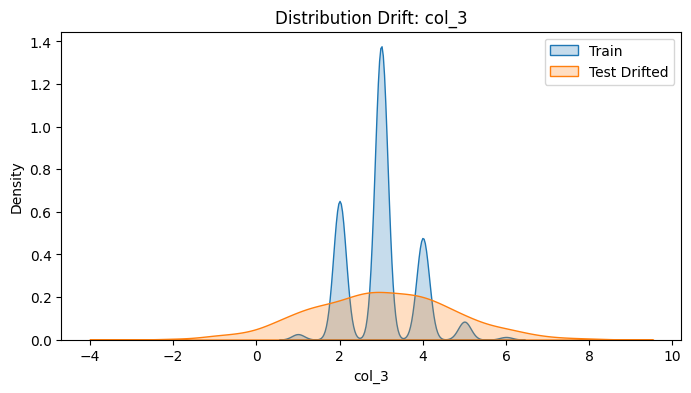

col_0: Train mean=24.03, Test Drifted mean=24.75
col_0: Train std=12.95, Test Drifted std=12.70
col_1: Train mean=1.11, Test Drifted mean=1.11
col_1: Train std=0.40, Test Drifted std=1.53
col_2: Train mean=2.68, Test Drifted mean=2.69
col_2: Train std=0.78, Test Drifted std=1.75
col_3: Train mean=2.99, Test Drifted mean=2.99
col_3: Train std=0.80, Test Drifted std=1.72
col_4: Train mean=5.73, Test Drifted mean=5.87
col_4: Train std=2.89, Test Drifted std=3.19


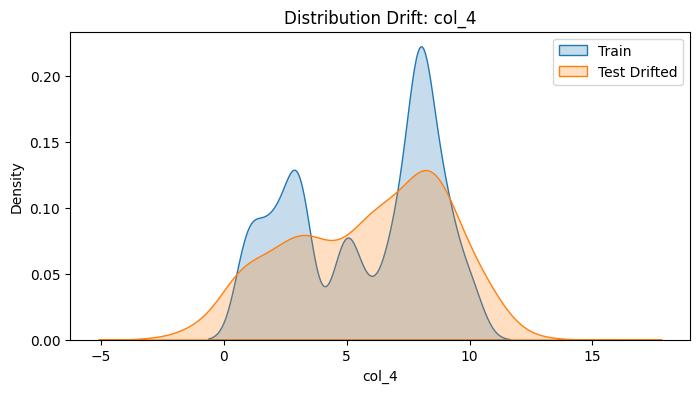

col_0: Train mean=24.03, Test Drifted mean=24.75
col_0: Train std=12.95, Test Drifted std=12.70
col_1: Train mean=1.11, Test Drifted mean=1.11
col_1: Train std=0.40, Test Drifted std=1.53
col_2: Train mean=2.68, Test Drifted mean=2.69
col_2: Train std=0.78, Test Drifted std=1.75
col_3: Train mean=2.99, Test Drifted mean=2.99
col_3: Train std=0.80, Test Drifted std=1.72
col_4: Train mean=5.73, Test Drifted mean=5.87
col_4: Train std=2.89, Test Drifted std=3.19


In [21]:
# ===============================
# 5️⃣ Comparar distribuciones (visualización)
# ===============================
for col in X_test_drifted.columns[:5]:
    plt.figure(figsize=(8,4))
    sns.kdeplot(X_train[col], label='Train', fill=True)
    sns.kdeplot(X_test_drifted[col], label='Test Drifted', fill=True)
    plt.title(f'Distribution Drift: {col}')
    plt.legend()
    plt.show()

    for col in X_test_drifted.columns[:5]:
        print(f"{col}: Train mean={X_train[col].mean():.2f}, Test Drifted mean={X_test_drifted[col].mean():.2f}")
        print(f"{col}: Train std={X_train[col].std():.2f}, Test Drifted std={X_test_drifted[col].std():.2f}")



In [22]:
# ===============================
# 6️⃣ Métrica simple de drift (Kolmogorov-Smirnov)
# ===============================
from scipy.stats import ks_2samp

drift_scores = {}
for col in X_test_drifted.columns:
    stat, p_value = ks_2samp(X_train[col], X_test_drifted[col])
    drift_scores[col] = p_value

# Columnas con p_value < 0.05 probablemente sufrieron drift
drifted_cols = [col for col, p in drift_scores.items() if p < 0.05]

print("Columnas con drift significativo:", drifted_cols)


Columnas con drift significativo: ['col_0', 'col_1', 'col_2', 'col_3', 'col_4']


col_0: p-value=0.00000 <-- drift significativo
col_1: p-value=0.00000 <-- drift significativo
col_2: p-value=0.00000 <-- drift significativo
col_3: p-value=0.00000 <-- drift significativo
col_4: p-value=0.00000 <-- drift significativo
col_5: p-value=1.00000
col_6: p-value=0.74491
col_7: p-value=0.99207
col_8: p-value=0.99232
col_9: p-value=0.09991
col_10: p-value=0.99934
col_11: p-value=0.08617
col_12: p-value=0.98504
col_13: p-value=0.80950
col_14: p-value=0.91251
col_15: p-value=0.18860
col_16: p-value=1.00000
col_17: p-value=0.77846
col_18: p-value=0.58911
col_19: p-value=0.99932
col_20: p-value=0.99186
col_21: p-value=0.92863
col_22: p-value=0.25568
col_23: p-value=0.83444
col_24: p-value=0.35727
col_25: p-value=0.49329
col_26: p-value=0.99808
col_27: p-value=0.09468
col_28: p-value=0.56708
col_29: p-value=0.10622
col_30: p-value=0.11694
col_31: p-value=0.05334
col_32: p-value=0.84890
col_33: p-value=0.08710
col_34: p-value=0.46049
col_35: p-value=0.42653
col_36: p-value=1.00000
co

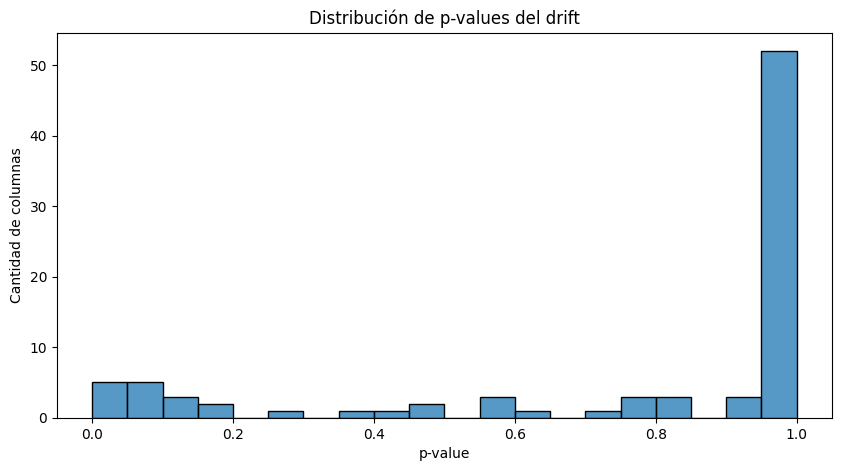

In [23]:
for col, p in drift_scores.items():
    print(f"{col}: p-value={p:.5f}{' <-- drift significativo' if p<0.05 else ''}")

# Distribución de todos los p-values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(list(drift_scores.values()), bins=20)
plt.title("Distribución de p-values del drift")
plt.xlabel("p-value")
plt.ylabel("Cantidad de columnas")
plt.show()
